# Loading data

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

from pathlib import Path

from src.load_scripts import load_ipython_data

figsize = (10, 7)
resolution = 300 # dpi

In [5]:
item, defects, log, defect_log = load_ipython_data(Path('data/ipython'), Path('data/defects.csv'))

Loading ipython data...
Loading item...Done.
Cleaning...
	Dropped 8 unused columns
	Decoding instructions and solutions...Done
All finished. Returning item.
Loading defects...Done.
Cleaning...
	Dropped 32 unused columns
	Dropped 15 defects not detected by EduLint
	Cleaning EduLint codes...	Done.
Done.
All finished. Returning defects.
Loading log... Done. Found 395020 values.
Cleaning...
	Dropped 817 duplicates.
	Dropped 362 rows with missing values.
	Converting types...
		Time... Done.
		Correct... Done.
	Done.
	Decoding submissions... Done.
	Dropped 334 rows with empty submissions.
Done.
All finished. Returning log with 393507 values.
Loading messages...Done.
All finished. Returning messages for 393841 submissions.
Merging EduLint messages with log...
Done. Dropped 334 submissions from messages. Dropped 0 submissions from log.
Assigning defects to EduLint messages...
Done.
Vectorizing defects...
Done.
All finished. Returning log, item, defects.


In [6]:
log

,id,user,item,answer,correct,moves,responseTime,time,codes,text,defects
0,8934,2121562,33,"def impose_fine(age, beer):\n return False",False,-1,4600,2018-08-02 14:14:38,(),(),[]
1,8935,2121562,33,"def impose_fine(age, beer):\n return False",False,-1,9000,2018-08-02 14:14:44,(),(),[]
2,8936,2121562,33,"def impose_fine(age, beer):\n return False",False,-1,10000,2018-08-02 14:14:45,(),(),[]
3,8937,2121562,33,"def impose_fine(age, beer):\n return False",False,-1,10700,2018-08-02 14:14:46,(),(),[]
4,8938,2121562,33,"def impose_fine(age, beer):\n return False",False,-1,12200,2018-08-02 14:14:48,(),(),[]
...,...,...,...,...,...,...,...,...,...,...,...
395015,427656,38849145,94,def helke(text):\n for letter in text:\n ...,False,0,752650,2023-09-17 21:17:31,(),(),[]
395016,427657,38849145,94,def helke(text):\n for letter in text:\n ...,True,0,899300,2023-09-17 21:19:57,"(E251, E251, E251, E251)",(4:27: E251 unexpected spaces around keyword /...,"[30, 30, 30, 30]"
395017,427658,38849145,145,"def letter_distances(text):\n for index, le...",True,0,787950,2023-09-17 21:46:45,"(C0103, C0103)","(3:8: C0103 Variable name ""currentLetter"" does...","[32, 32]"
395018,427659,38849145,26,def censorship(text):\n result = ''\n fo...,True,0,20100,2023-09-17 22:16:37,"(E9996,)",(3:4: E9996 This loop will only ever run for o...,[]


TODO try with only correct/final submissions

# Exploration

## Defects Histogram

In [78]:
counts = defect_log.sum(axis=0).sort_values(ascending=False)
percentages = counts / len(defect_log) * 100

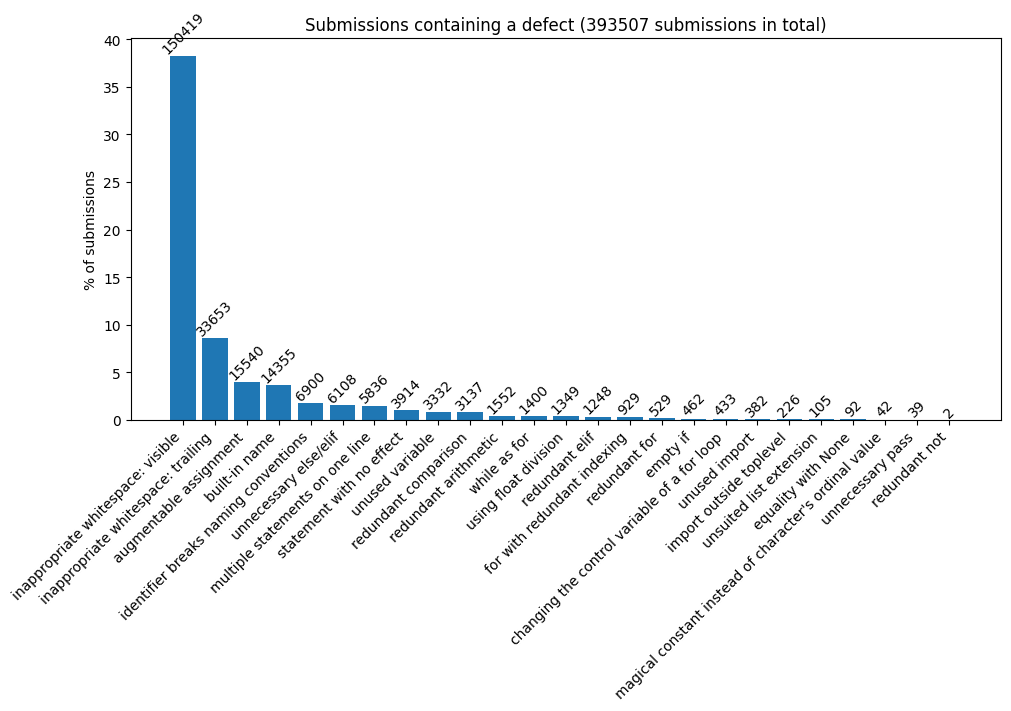

In [80]:
fig, ax = plt.subplots(layout="constrained", figsize=figsize)

p = ax.bar([defects['defect name'].loc[idx] for idx in counts.index], percentages)

ax.bar_label(p, labels = counts, label_type='edge', rotation=45)

ax.set_ylabel('% of submissions')
plt.xticks(rotation = 45, ha='right')
ax.set_title('Submissions containing a defect ({} submissions in total)'.format(len(defect_log)))

# plt.savefig('histogram.png', dpi=300)
plt.show()

## Submissions Histogram

In [72]:
counts = defect_log.sum(axis=1).value_counts()

In [74]:
counts

0    207319
1    131771
2     44921
3      7939
4      1300
5       193
6        60
7         3
8         1
Name: count, dtype: int64

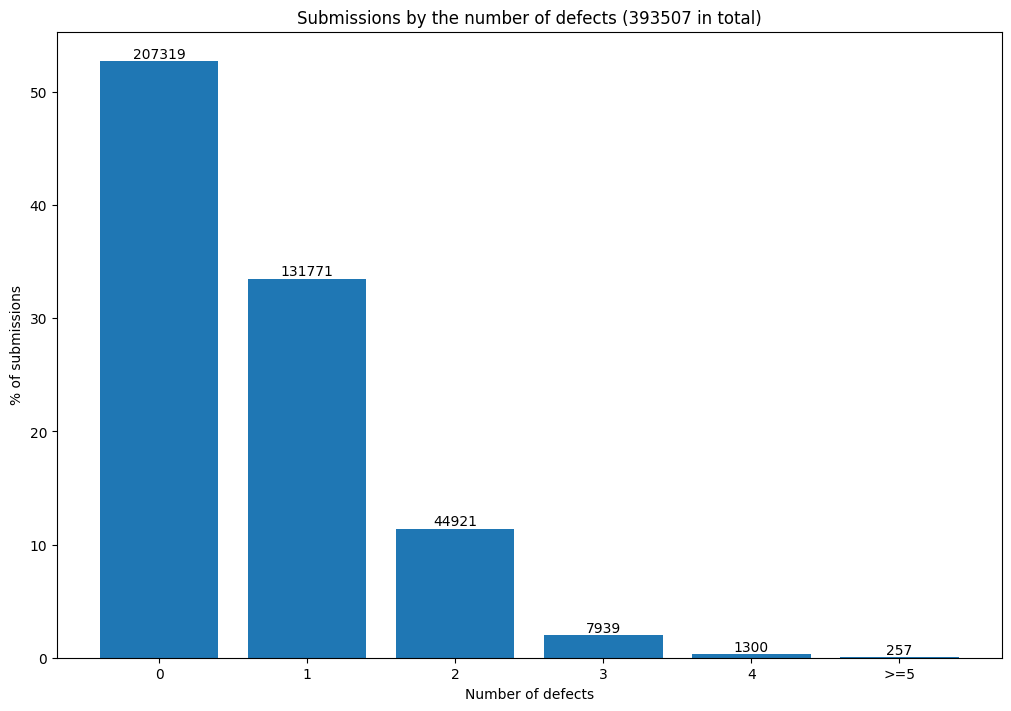

In [76]:
num_of_submissions = [str(i) for i in range(5)] + ['>=5']
defect_count = list(counts[:5]) + [counts[5:].sum()]
defect_percentage = list(map(lambda x: x / len(defect_log) * 100, defect_count))

fig, ax = plt.subplots(layout="constrained", figsize=figsize)

p = ax.bar(num_of_submissions, defect_percentage)

ax.bar_label(p, labels = defect_count, label_type='edge')

ax.set_ylabel('% of submissions')
ax.set_xlabel('Number of defects')
ax.set_title('Submissions by the number of unique defects ({} in total)'.format(len(defect_log)))

# plt.savefig('histogram.png', dpi=300)
plt.show()

## Co-occurance matrix

In [94]:
# co-occurances

co_occurances = (defect_log.T.dot(defect_log)).values
np.fill_diagonal(co_occurances, 0)

In [90]:
(co_occurances > 1000).sum() / 2

14.0

In [95]:
px.imshow(co_occurances)

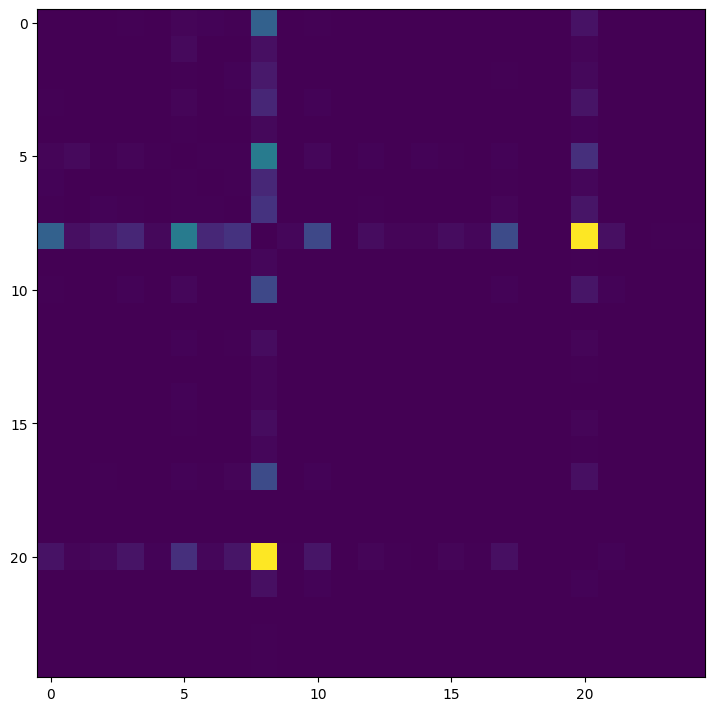

In [85]:
fig, ax = plt.subplots(layout="constrained", figsize=figsize)

p = ax.imshow(co_occurances)

# plt.savefig('histogram.png', dpi=300)
plt.show()